In [1]:
import os

data_path = os.getcwd() + '/DATA/'

In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from PIL import Image
from tqdm import tqdm_notebook as tqdm
from IPython.display import display, HTML

Notice that all the images have a huge of black background. If we find the biggest figure, we will be able to reduce the amount of memory and computation needed.

In [9]:

def max_extension(path, verbose = False):
    ''' Returns the max extension of the biggest figure in the collection (i.e. the minimum pixels needed)
    ---------
    PARAMETERS
    - path: string containing the dirpath to the data directory
    ---------
    RETURNS
    - (top, bot, left, right)
    
    '''
    # We initialize the values
    top, bot, left, right = np.inf, 0, np.inf, 0
    
    # Hence we only need to read one figure of each class and rotate it in order to get the max values
    for label in os.listdir(data_path):
        
        # We don't want to read hidden objects in the directory
        if label[0] != '.':
            # Iteration info
            if verbose:
                print('-' * 40)
                print(f"Reading figure {label}...")
                print('-' * 40)
            
            # Path to the first image of each label
            label_path = data_path + label + '/'
            first_image = list(os.listdir(label_path))[0]
            first_image = label_path + first_image
            
            try:
                image = Image.open(first_image).convert('L')
                image = np.asarray(image)
            except:
                print(f'Failed reading image!')
                
            # Double loop for every image
            top_, bot_, left_, right_ = np.inf, 0, np.inf, 0
            
            for i in range(200):
                for j in range(200):
                    if (image[i, j] != 0):
                        if i < top_: top_ = i
                        if i > bot_: bot_ = i
                        if j < left_: left_ = j
                        if j > right_: right_ = j
            
            if verbose:
                print(f"Max values: {top_}, {bot_}, {left_}, {right_}\n")
            
            # Update global values if necessary
            if top_ < top: top = top_
            if bot_ > bot: bot = bot_
            if left_ < left: left = left_
            if right_ > right: right = right_
        
    return (top, bot, left, right)
                      
top, bot, left, right = max_extension(data_path)

print(f"top: {top}, bot: {bot}, left: {left}, right: {right}")

top: 24, bot: 188, left: 0, right: 171


In [19]:
colnames = ['pixel' + str(i) for i in range(1, 4001)]
colnames.append('label')

def read_all_data(path):
    '''
    
    '''
    
    for it, label in tqdm(enumerate(os.listdir(data_path)), total = 16):
        if label[0] != '.':
            label_dir = data_path + label + '/'
            
            count = 379 if (label == '2357 Brick corner 1x2x2') else 400
            
            for i, im in tqdm(enumerate(os.listdir(label_dir)), total = count):
                
                try:
                    image = Image.open(label_dir + im).convert('L')
                    image = list(np.asarray(image).flatten().astype('uint8'))
                    image.append(label)

                    if i == 0: label1 = image
                    else: label1 = np.vstack((label1, image))
                
                except:
                    print(f'Failed reading image: {im}')
            
            if it == 0: 
                dataframe = pd.DataFrame(label1)
            else: 
                dataframe = dataframe.append(pd.DataFrame(label1))
                
    return dataframe
        
dataframe = read_all_data(data_path)   
        
dataframe   

/Users/berges/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  if __name__ == '__main__':


/Users/berges/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:15: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  from ipykernel import kernelapp as app


,0,1,2,3,4,5,6,7,8,9,...,39991,39992,39993,39994,39995,39996,39997,39998,39999,40000
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3005 Brick 1x1
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3005 Brick 1x1
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3005 Brick 1x1
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3005 Brick 1x1
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3005 Brick 1x1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3673 Peg 2M
396,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3673 Peg 2M
397,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3673 Peg 2M
398,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3673 Peg 2M


In [20]:
export = dataframe.to_csv(r'flattened.csv', index = False, header = False)

Read the file:

In [31]:
def read_data():
    # Specify dtypes
    dtypes = {'pixel-' + str(i): 'uint8' for i in range(1, 40001)}
    dtypes.update({'label' : 'category'})
    
    colnames = list(dtypes.keys())
    
    print('Reading data...')
    data = pd.read_csv(
        'flattened.csv', header = None, names = colnames, dtype = dtypes
    )
    print(f'train.cv file has {data.shape[0]} rows and {data.shape[1]} columns')
    print(f'Memory usage: {round(data.memory_usage().sum() / 1024**2, 3)} Mb\n')
    
    return data

In [32]:
%%time

lego = read_data()
display(lego)

Reading data...
train.cv file has 6379 rows and 40001 columns
Memory usage: 243.346 Mb



,pixel-1,pixel-2,pixel-3,pixel-4,pixel-5,pixel-6,pixel-7,pixel-8,pixel-9,pixel-10,...,pixel-39992,pixel-39993,pixel-39994,pixel-39995,pixel-39996,pixel-39997,pixel-39998,pixel-39999,pixel-40000,label
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3005 Brick 1x1
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3005 Brick 1x1
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3005 Brick 1x1
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3005 Brick 1x1
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3005 Brick 1x1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6374,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3673 Peg 2M
6375,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3673 Peg 2M
6376,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3673 Peg 2M
6377,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3673 Peg 2M


CPU times: user 3min 34s, sys: 3.94 s, total: 3min 38s
Wall time: 3min 38s


In [151]:
# just tryin' some stuff:
im1 = np.array(lego.iloc[0][:-1]).astype('uint8')
im2 = np.array(lego.iloc[1][:-1]).astype('uint8')

In [121]:
y, ybins = list(np.histogram(image, bins = 255))
y2, y2bins = list(np.histogram(image2, bins = 255))
y2[0]

33796

In [206]:
def histogram_intersection(im1, im2, n_bins = 255, normalization = False):
    ''' Histogram intersection of two gray-scale images -> it finds the number of matches at level 'L'
    ----------
    PARAMETERS
    - im1, im2: flattened numpy.ndarray representing a 200x200 image (must be of the same length)
    - n_bins: integer that defines the number of equal-width bins in the given range
    - normalization: Boolean indicating if normalization should be performed
    ----------
    RETURNS
    - intersection: returns a histogram representing the intersection
    
    '''
    assert len(im1) == len(im2), "Length of images 'im1' and 'im2' must be the same"
    
    # Build the histograms from 'im1' and 'im2' espectively, with the specified number of bins
    h1, _ = np.histogram(im1, bins = n_bins, range = (0, 255))
    h2, _ = np.histogram(im1, bins = n_bins, range = (0, 255))
    
    intersection = np.minimum(h1, h2)
    #intersect = np.true_divide(np.sum(intersect), np.sum(h2)) if normalization else np.sum(intersect)
    
    return intersection



def divide_image(im, l):
    ''' Split the image matrix 'im' into 2^(2L) blocks
    ----------
    PARAMETERS
    - im: flattened numpy.ndarray representing a 200x200 image
    - L: grid levels
    ----------
    RETURNS
    - list with the different blocks of the image
     
    '''
    assert len(im) == 40000, 'Image is not 200x200 resolution'
    
    nrows = 200 // (2**l)
    im = np.reshape(im, newshape = (200, 200))
    
    splits = (im.reshape(200//nrows, nrows, -1, nrows)
                .swapaxes(1, 2)
                .reshape(-1, nrows, nrows))
    
    # Return the flattened split of the image
    return [split.flatten() for split in splits]



def kernel_ij(im1, im2, L, n_bins = 255, normalization = False):
    '''
    
    
    '''
    
    # For I_0
    histogram = (1/2**L) * histogram_intersection(im1, im2, n_bins, normalization)    
    
    # For the rest:
    for l in range(1, L + 1):

        # Split images into 2^2l blocks
        im1_split = divide_image(im1, l)
        im2_split = divide_image(im2, l)

        # Factor in the l-th iteration
        factor = 1 / (2**(L - l + 1))

        intersection = np.zeros(n_bins)
        # Compute and add histogram intersection of every block
        for i in range(len(im1_split)):
            intersection += factor * histogram_intersection(im1_split[i], im2_split[i], n_bins, normalization)

        histogram += intersection
    
    return histogram

In [208]:
kernel_ij(im1, im2, n_bins = 20, L = 3) == kernel_ij(im1, im2, n_bins = 20, L = 0)

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True])

In [146]:
split_image = divide_image(image, 1)

In [147]:
split_image

[array([  0,   0,   0, ..., 156, 154, 154], dtype=uint8),
 array([0, 0, 0, ..., 0, 0, 0], dtype=uint8),
 array([0, 0, 0, ..., 0, 0, 0], dtype=uint8),
 array([154, 154, 153, ...,   0,   0,   0], dtype=uint8)]

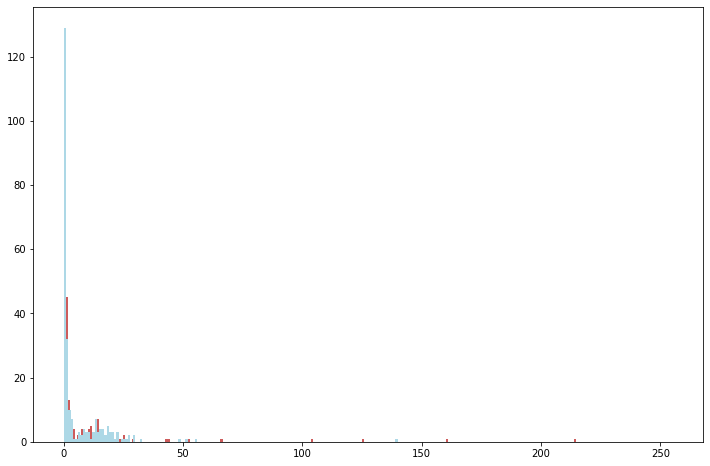

In [118]:
plt.figure(figsize = (12, 8))
plt.hist(y, bins = ybins, color = 'indianred')
plt.hist(y2, bins = y2bins, color = 'lightblue')

plt.show()

PNG
RGBA
(200, 200)


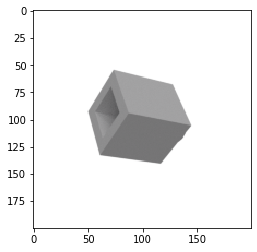

In [24]:
from PIL import Image
import matplotlib.pyplot as plt

# load the image
image = Image.open('./DATA/3005 Brick 1x1/0267.png')
# summarize some details about the image
print(image.format)
print(image.mode)
print(image.size)
#show the image
plt.imshow(image)

float32
(200, 200, 4)


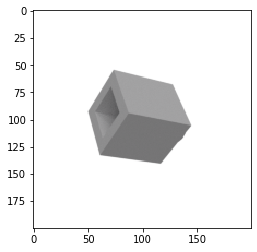

In [25]:
from matplotlib import image

data = image.imread('./DATA/3005 Brick 1x1/0267.png')
print(data.dtype)
print(data.shape)

plt.imshow(data)
plt.show()

In [29]:
img = Image.open('./DATA/3005 Brick 1x1/0267.png').convert('L')
data = np.asarray(img)
data.shape

(200, 200)

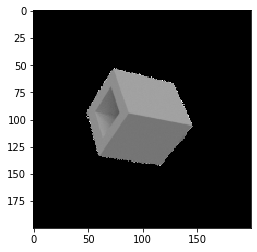

In [39]:
plt.imshow(data, cmap = 'gray', vmin = 0, vmax = 255)